In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./cancer_dataset.csv")

In [3]:
df

,district,last_cancer_screening,current_cancer,have_children,gender,weight,height,age,red_meat_weekly,veg_weekly,...,breast_q1,breast_q2,breast_q3,breast_q4,breast_q5,liver_q1,liver_q2,liver_q3,liver_q4,liver_q5
0,District 5,A year ago,No,Yes,Female,56,160.0,30,2,8.0,...,No,No,No,No,No,No,No,No,No,No
1,Binh Tan District,A year ago,No,Yes,Male,63,165.0,40,3,5.0,...,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes
2,District 3,A year ago,No,Yes,Female,60,162.0,31,3,14.0,...,No,No,No,No,No,No,No,No,No,No
3,Tan Binh District,A year ago,No,Yes,Male,72,175.0,30,4,6.0,...,No,No,No,No,No,No,Yes,No,No,Yes
4,District 1,A year ago,No,Yes,Male,63,165.0,40,3,5.0,...,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Binh Thanh District,A year ago,No,NaN,Female,52,153.0,46,2,7.0,...,No,No,No,No,No,No,Yes,Yes,No,Yes
179,Thu Duc District,A year ago,No,NaN,Female,61,158.0,40,4,7.0,...,No,No,No,No,No,No,No,No,No,No
180,District 12,A year ago,No,NaN,Male,59,163.0,65,1,7.0,...,No,No,No,No,No,No,No,No,No,No
181,District 12,6 months ago,No,NaN,Female,52,155.0,55,2,7.0,...,No,No,No,No,No,No,No,No,No,No


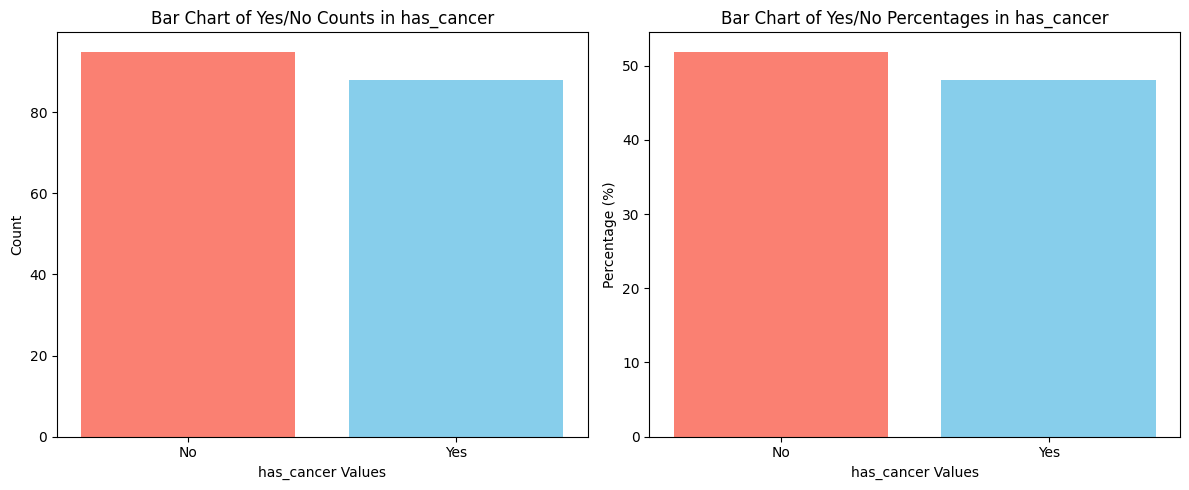

current_cancer
No     95
Yes    88
Name: count, dtype: int64

In [4]:
counts = df['current_cancer'].value_counts()


# Calculate percentages
percentages = counts / counts.sum() * 100

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart with Counts
axs[0].bar(counts.index, counts.values, color=['salmon', 'skyblue'])
axs[0].set_title('Bar Chart of Yes/No Counts in has_cancer')
axs[0].set_xlabel('has_cancer Values')
axs[0].set_ylabel('Count')

# Bar Chart with Percentages
axs[1].bar(percentages.index, percentages.values, color=['salmon', 'skyblue'])
axs[1].set_title('Bar Chart of Yes/No Percentages in has_cancer')
axs[1].set_xlabel('has_cancer Values')
axs[1].set_ylabel('Percentage (%)')

# Adjust layout
plt.tight_layout()
plt.show()
counts

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['district_encoded'] = label_encoder.fit_transform(df['district'])

binary_questions = ['breast_q1', 'breast_q2', 'breast_q3', 'breast_q4',	'breast_q5', 'liver_q1', 'liver_q2', 'liver_q3', 'liver_q4', 'liver_q5']

df = df.replace(to_replace = ['Yes', 'No'], value = [1, 0])

df['breast_score'] = df[binary_questions[0:5]].sum(axis=1)
df['liver_score'] = df[binary_questions[5:]].sum(axis=1)

/var/folders/td/cp8pk7qn70s163f4fndy1jt40000gn/T/ipykernel_73311/1228530410.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace = ['Yes', 'No'], value = [1, 0])


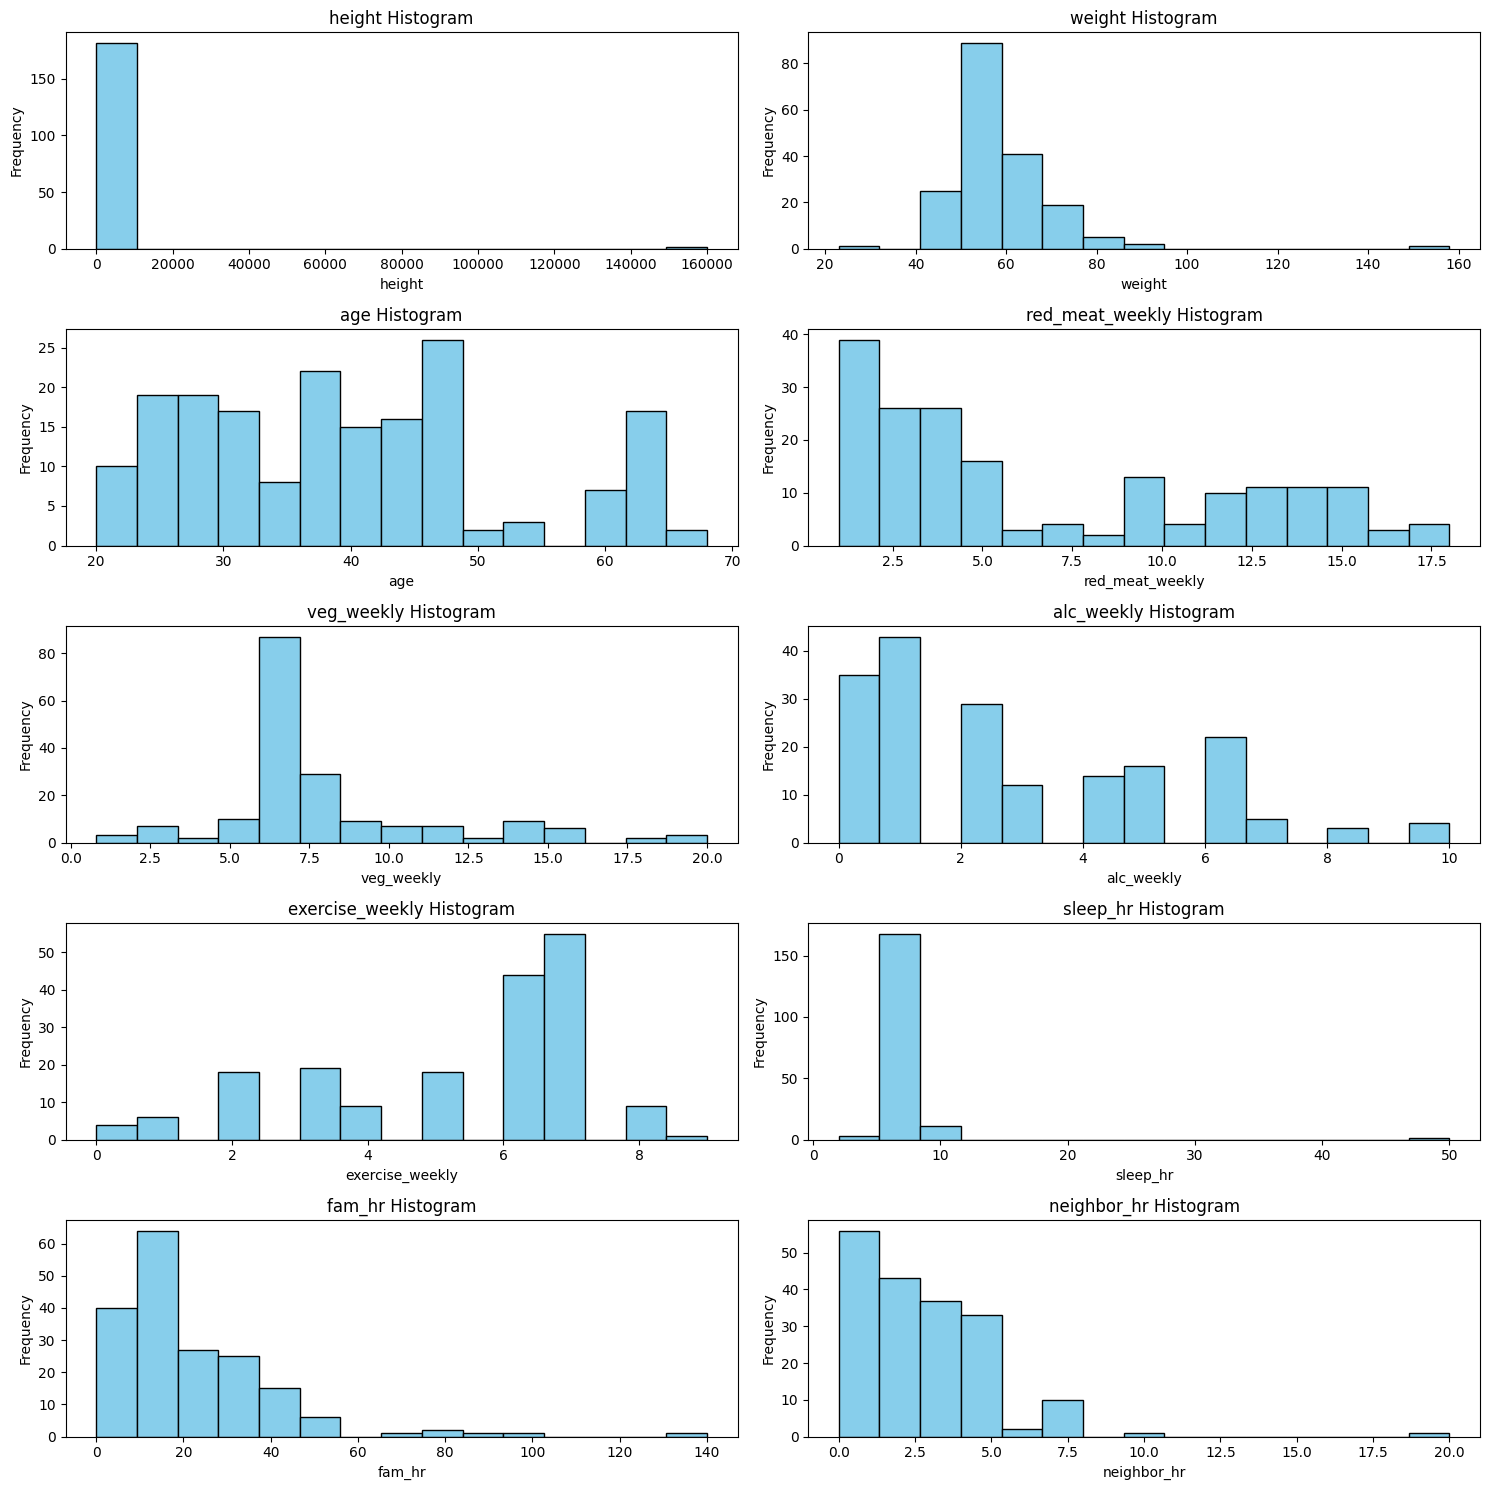

In [6]:
variables = ['height', 'weight', 'age', 'red_meat_weekly', 'veg_weekly', 
             'alc_weekly', 'exercise_weekly', 'sleep_hr', 'fam_hr', 'neighbor_hr']

# Create histograms
plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(5, 2, i + 1)  # Adjust layout for 10 variables
    plt.hist(df[var], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'{var} Histogram')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

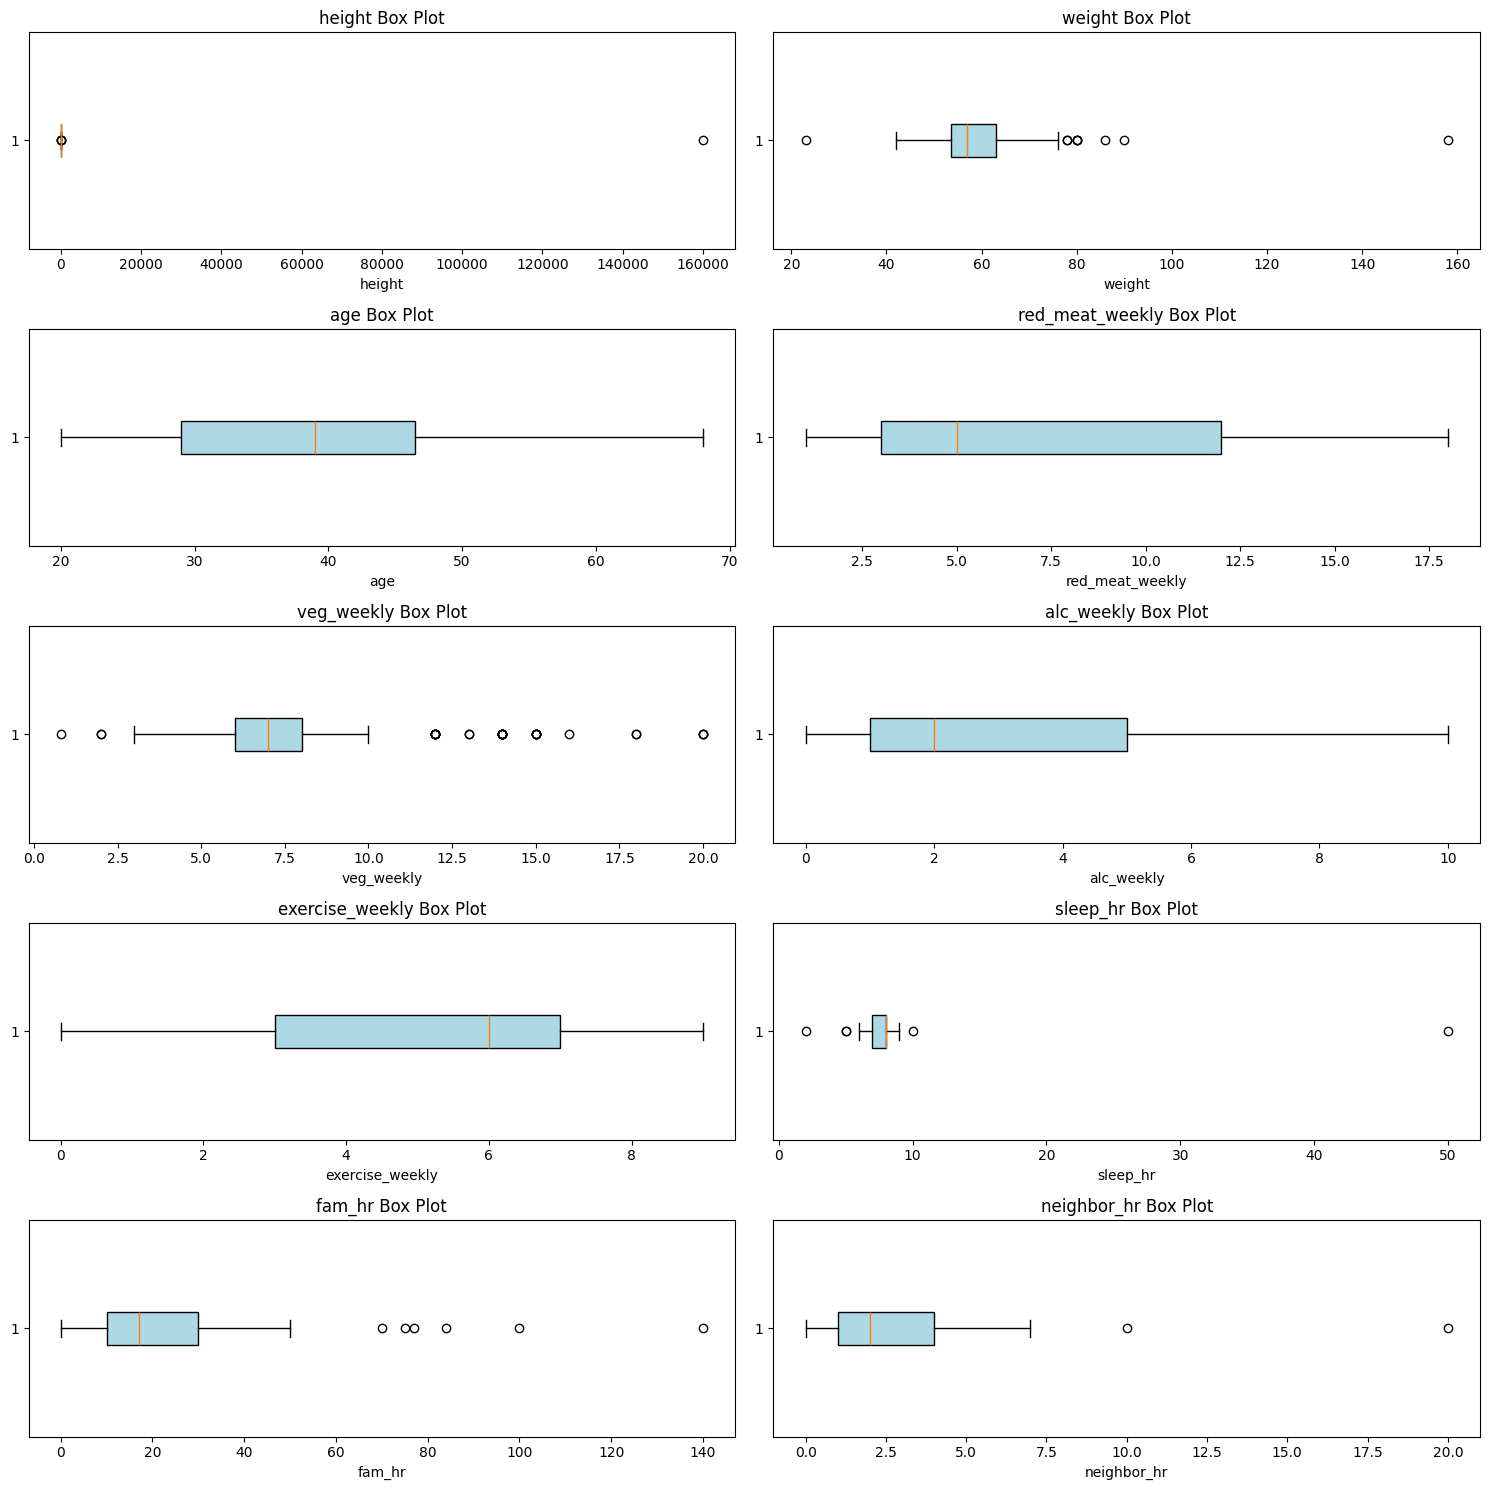

In [7]:
plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(5, 2, i + 1)  # Adjust layout for 10 variables
    plt.boxplot(df[var], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'{var} Box Plot')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

In [8]:
df.loc[df['height'] == 160000, 'height'] = 160
df.loc[df['height'] == 1.55, 'height'] = 155
df.loc[df['height'] == 1.58, 'height'] = 158
df.loc[df['height'] == 60, 'height'] = 160

df = df[(df['weight'] < 158) & (df['weight'] > 23)]
df = df[(df['sleep_hr'] < 40) & (df['sleep_hr'] > 2)]
df['bmi'] = df['weight']/(df['height']/100)**2

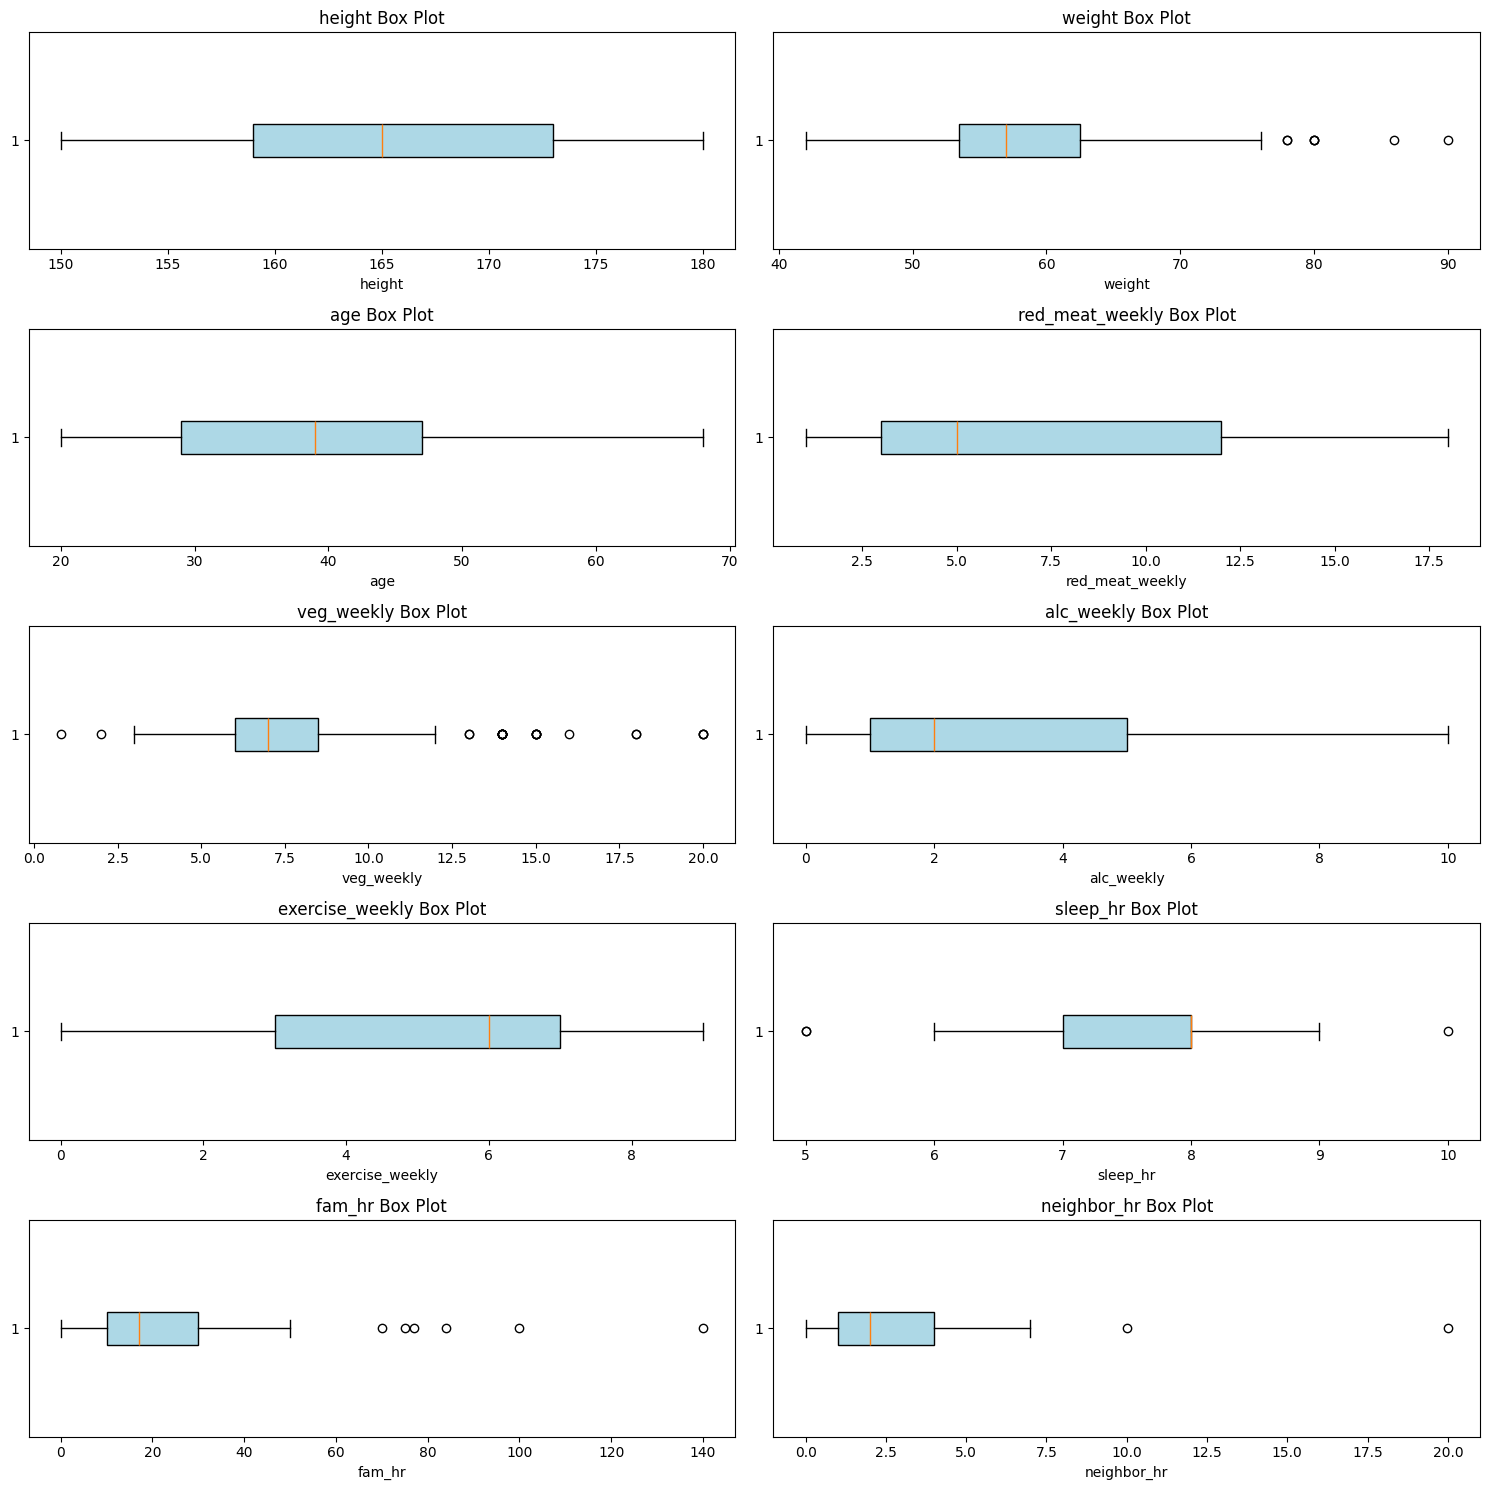

In [9]:
plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(5, 2, i + 1)  # Adjust layout for 10 variables
    plt.boxplot(df[var], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'{var} Box Plot')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

In [10]:
df.drop(columns=binary_questions + ['have_children', 'weight', 'height', 'district', 'chronic_dis_list'], inplace = True)

In [11]:
# For cancer history, we assume people who are not sure to not have cancer history.

replacements = {
    'A year ago': 0,
    '6 months ago': 1,
    'Female': 0,
    'Male': 1,
    'Not sure': 0
}

# Replace all values in one line
df = df.replace(replacements)

/var/folders/td/cp8pk7qn70s163f4fndy1jt40000gn/T/ipykernel_73311/2081458535.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(replacements)


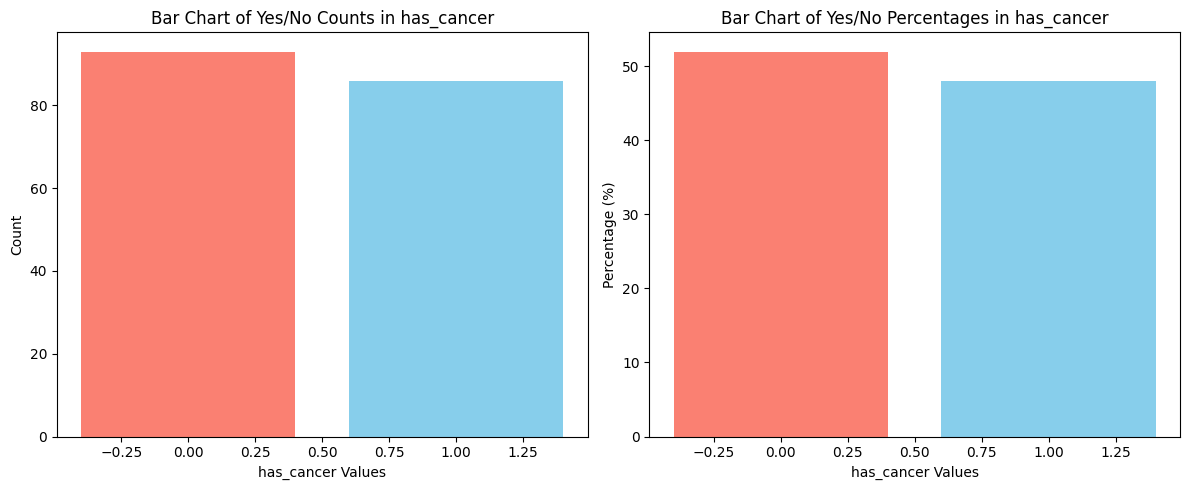

current_cancer
0    93
1    86
Name: count, dtype: int64

In [12]:
counts = df['current_cancer'].value_counts()


# Calculate percentages
percentages = counts / counts.sum() * 100

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart with Counts
axs[0].bar(counts.index, counts.values, color=['salmon', 'skyblue'])
axs[0].set_title('Bar Chart of Yes/No Counts in has_cancer')
axs[0].set_xlabel('has_cancer Values')
axs[0].set_ylabel('Count')

# Bar Chart with Percentages
axs[1].bar(percentages.index, percentages.values, color=['salmon', 'skyblue'])
axs[1].set_title('Bar Chart of Yes/No Percentages in has_cancer')
axs[1].set_xlabel('has_cancer Values')
axs[1].set_ylabel('Percentage (%)')

# Adjust layout
plt.tight_layout()
plt.show()
counts

In [13]:
df

,last_cancer_screening,current_cancer,gender,age,red_meat_weekly,veg_weekly,alc_weekly,exercise_weekly,sleep_hr,fam_hr,neighbor_hr,cancer_his,have_cancer_before,chronic_disease,district_encoded,breast_score,liver_score,bmi
0,0,0,0,30,2,8.0,3,6,9.0,40,4.0,0,0,0,9,0,0.0,21.875000
1,0,0,1,40,3,5.0,2,3,6.0,18,3.0,1,0,1,0,2,4.0,23.140496
2,0,0,0,31,3,14.0,3,2,7.0,28,2.0,0,0,1,7,0,0.0,22.862369
3,0,0,1,30,4,6.0,1,3,6.0,48,1.0,0,0,0,16,0,2.0,23.510204
4,0,0,1,40,3,5.0,2,3,7.0,15,2.0,1,0,1,2,3,3.0,23.140496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0,0,0,46,2,7.0,0,7,7.0,84,0.5,0,0,1,1,0,3.0,22.213678
179,0,0,0,40,4,7.0,1,7,9.0,5,1.0,0,0,0,18,0,0.0,24.435187
180,0,0,1,65,1,7.0,1,6,6.5,50,1.5,0,0,1,5,0,0.0,22.206331
181,1,0,0,55,2,7.0,0,6,6.5,40,1.0,0,0,1,5,0,0.0,21.644121


In [14]:
# Model training for real dataset
X = df.drop(columns=['current_cancer'])
y = df['current_cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.94      0.94      0.94        17

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36

ROC-AUC Score: 0.9876160990712074


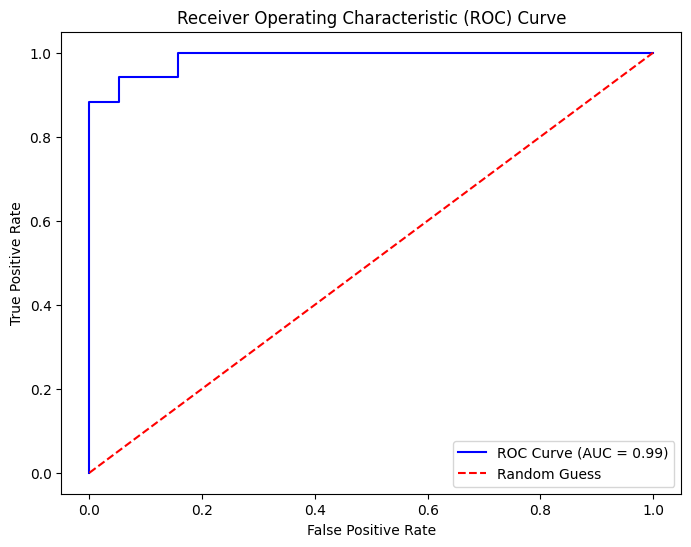

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

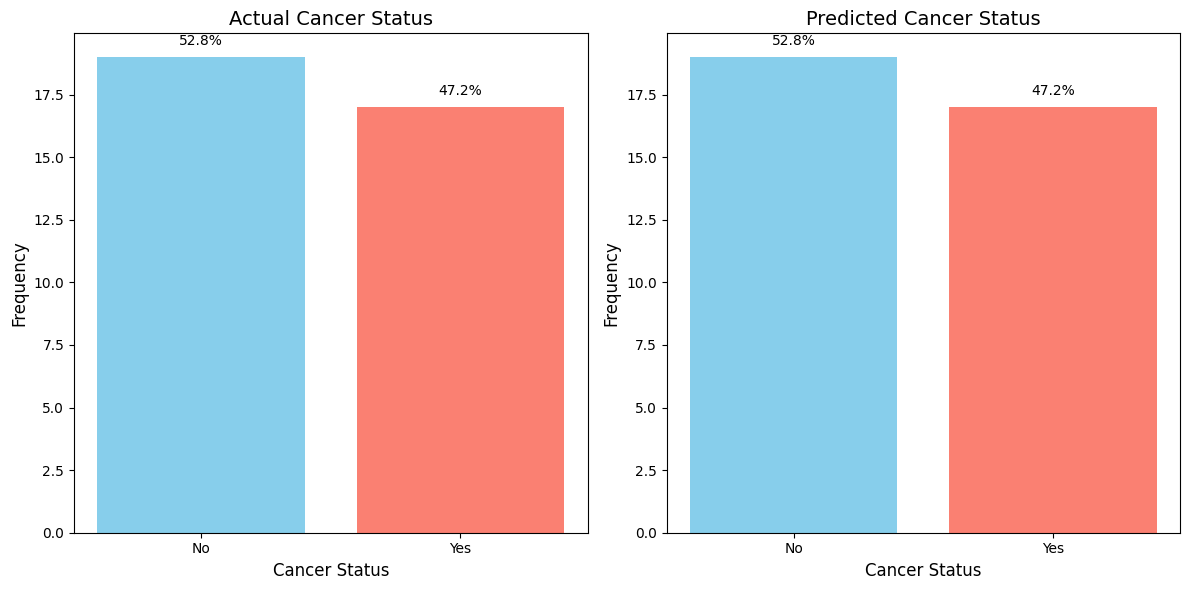

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to pandas Series if y_pred and y_test are numpy arrays
y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

# Compute counts and percentages for actual data
actual_counts = y_test_series.value_counts().sort_index()
actual_percentages = actual_counts / actual_counts.sum() * 100

# Compute counts and percentages for predicted data
predicted_counts = y_pred_series.value_counts().sort_index()
predicted_percentages = predicted_counts / predicted_counts.sum() * 100

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Actual Cancer Status
axes[0].bar(['No', 'Yes'], actual_counts, color=['skyblue', 'salmon'])
axes[0].set_title('Actual Cancer Status', fontsize=14)
axes[0].set_xlabel('Cancer Status', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Add percentages as labels above bars
for i, v in enumerate(actual_counts):
    axes[0].text(i, v + 0.5, f'{actual_percentages[i]:.1f}%', ha='center', fontsize=10)

# Predicted Cancer Status
axes[1].bar(['No', 'Yes'], predicted_counts, color=['skyblue', 'salmon'])
axes[1].set_title('Predicted Cancer Status', fontsize=14)
axes[1].set_xlabel('Cancer Status', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Add percentages as labels above bars
for i, v in enumerate(predicted_counts):
    axes[1].text(i, v + 0.5, f'{predicted_percentages[i]:.1f}%', ha='center', fontsize=10)

# Finalize layout
plt.tight_layout()
plt.show()

In [132]:
# Augment Data using SMOTENC

from imblearn.over_sampling import SMOTENC

categorical_features = [13]  # Indexes of categorical columns in X
continuous_features = [col for col in range(X.shape[1]) if col not in categorical_features]

# Initialize SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy= {0: 186, 1: 172}, random_state=42) # I calculate the exact new data need to generate to match the real data distribution

# Apply SMOTENC to the data
X_smotenc, y_smotenc = smote_nc.fit_resample(X, y)

print(f"Original dataset size: {X.shape}, {y.shape}")
print(f"Resampled dataset size: {X_smotenc.shape}, {y_smotenc.shape}")

Original dataset size: (179, 17), (179,)
Resampled dataset size: (358, 17), (358,)


In [133]:
# Model training for SMOTENC dataset
X_train, X_test, y_train, y_test = train_test_split(X_smotenc, y_smotenc, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.91      0.95        32

    accuracy                           0.96        72
   macro avg       0.97      0.95      0.96        72
weighted avg       0.96      0.96      0.96        72

ROC-AUC Score: 0.99375


In [134]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_smotenc, y_smotenc, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Average cross-validation accuracy: {cv_scores.mean()}")

Cross-validation accuracy scores: [0.91666667 0.90277778 0.95833333 0.95774648 1.        ]
Average cross-validation accuracy: 0.9471048513302034


/opt/anaconda3/envs/stats202_hw5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/envs/stats202_hw5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt

/opt/anaconda3/envs/stats202_hw5/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/opt/anaconda3/envs/stats202_hw5/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.

Gen. (0.01) | Discrim. (-0.61): 100%|█████████| 487/487 [00:13<00:00, 36.36it/s]


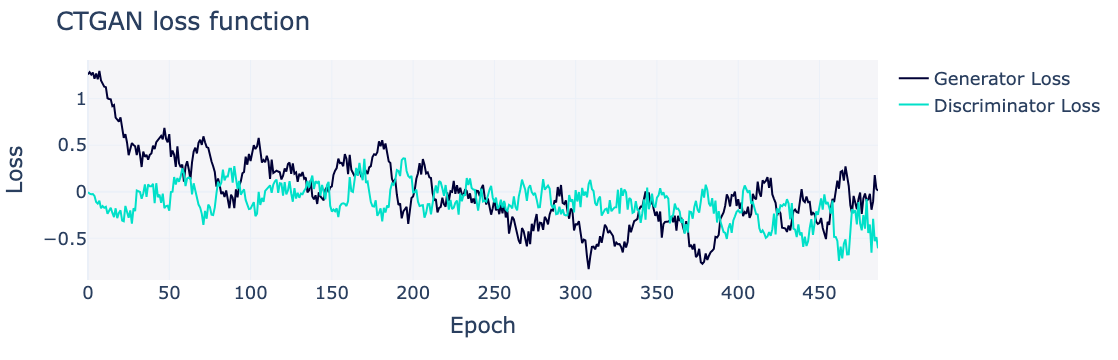

In [108]:
# Augment Data using CTGAN

from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

synthesizer = CTGANSynthesizer(metadata, epochs=487, verbose=True)

synthesizer.fit(df)
fig = synthesizer.get_loss_values_plot()
fig.show()

In [116]:
# Generate synthetic data
num_synthetic_samples = 300 - 179
synthetic_data = synthesizer.sample(num_rows=num_synthetic_samples)

# Create augmented dataset
augmented_data = pd.concat([df, synthetic_data], ignore_index=True)
augmented_data.to_csv('augmented_cancer_risk_dataset.csv', index=False)
augmented_data

,last_cancer_screening,current_cancer,gender,age,red_meat_weekly,veg_weekly,alc_weekly,exercise_weekly,sleep_hr,fam_hr,neighbor_hr,cancer_his,have_cancer_before,chronic_disease,district_encoded,breast_score,liver_score,bmi
0,0,0,0,30,2,8.0,3,6,9.0,40,4.0,0,0,0,9,0,0.0,21.875000
1,0,0,1,40,3,5.0,2,3,6.0,18,3.0,1,0,1,0,2,4.0,23.140496
2,0,0,0,31,3,14.0,3,2,7.0,28,2.0,0,0,1,7,0,0.0,22.862369
3,0,0,1,30,4,6.0,1,3,6.0,48,1.0,0,0,0,16,0,2.0,23.510204
4,0,0,1,40,3,5.0,2,3,7.0,15,2.0,1,0,1,2,3,3.0,23.140496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,0,0,30,5,6.5,1,3,8.0,26,0.8,1,0,0,2,0,4.0,26.775468
296,0,1,1,36,12,8.5,0,8,6.8,19,5.2,0,1,0,8,0,0.0,21.722196
297,0,1,1,57,14,4.2,0,8,7.8,4,2.7,1,1,1,4,0,0.0,27.143037
298,1,1,1,53,7,6.2,2,7,7.9,15,2.7,0,0,1,1,5,0.0,25.419532


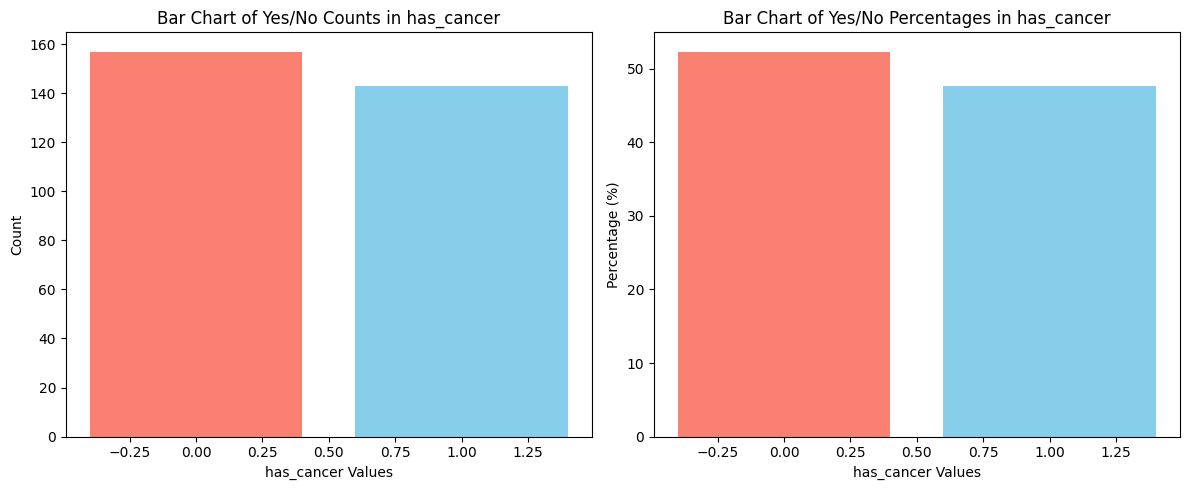

current_cancer
0    157
1    143
Name: count, dtype: int64

In [112]:
counts = augmented_data['current_cancer'].value_counts()

# Calculate percentages
percentages = counts / counts.sum() * 100

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart with Counts
axs[0].bar(counts.index, counts.values, color=['salmon', 'skyblue'])
axs[0].set_title('Bar Chart of Yes/No Counts in has_cancer')
axs[0].set_xlabel('has_cancer Values')
axs[0].set_ylabel('Count')

# Bar Chart with Percentages
axs[1].bar(percentages.index, percentages.values, color=['salmon', 'skyblue'])
axs[1].set_title('Bar Chart of Yes/No Percentages in has_cancer')
axs[1].set_xlabel('has_cancer Values')
axs[1].set_ylabel('Percentage (%)')

# Adjust layout
plt.tight_layout()
plt.show()
counts

In [113]:
# Model training for CTGAN dataset

X_ctgan = augmented_data.drop(columns=['current_cancer'])
y_ctgan = augmented_data['current_cancer']
X_train, X_test, y_train, y_test = train_test_split(X_ctgan, y_ctgan, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.6833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72        36
           1       0.59      0.67      0.63        24

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.69      0.68      0.69        60

ROC-AUC Score: 0.8125


## We can potentially use SMOTENC to generate more data and retrain the model. Currently, we're also using too many variables (17 variables). I'll try to see if I can reduce this number and see if we can preserve this performance.